<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/MeanReversionTradingStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 748 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=91981936ca18aabd8e493422c2cf9e47589cb832382d300681b83361b06c5d88
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [ ]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import ta
import matplotlib.pyplot as plt


In [ ]:
df = yf.download('AAPL', start = '2018-12-31')


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124851,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753826,219111200
...,...,...,...,...,...,...
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200


In [ ]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2*df.vol)
df['lower_bb'] = df.ma_20 - (2*df.vol)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124851,140014000,NaN,NaN,NaN,NaN
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800,NaN,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800,NaN,NaN,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400,NaN,NaN,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753826,219111200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500,156.724000,6.777250,170.278501,143.169499
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500,157.911500,6.785961,171.483421,144.339578
2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200,158.912500,6.796512,172.505523,145.319477


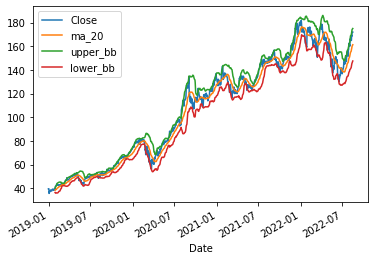

In [ ]:
df[['Close', 'ma_20', 'upper_bb', 'lower_bb']].plot()

In [ ]:
df['rsi'] = ta.momentum.rsi(df.Close, window = 6)

In [ ]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb), 
              (df.rsi > 70) & (df.Close > df.upper_bb)]

In [ ]:
choices = ['Buy', 'Sell']

In [ ]:
df['signal'] = np.select(conditions, choices)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2022-06-03,146.899994,147.970001,144.460007,145.380005,145.178345,88570300,146.105501,5.447720,157.000942,135.210060,46.020987,0
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.937286,71598400,145.548501,4.772742,155.093985,136.003016,48.485372,0
2022-06-07,144.350006,149.000000,144.100006,148.710007,148.503723,67808200,145.381001,4.587378,154.555757,136.206245,56.537385,0
2022-06-08,148.580002,149.869995,147.460007,147.960007,147.754776,53950200,145.053502,4.110349,153.274199,136.832805,53.603294,0
2022-06-09,147.080002,147.949997,142.529999,142.639999,142.442139,69473000,144.860502,4.129432,153.119366,136.601637,37.179497,0
2022-06-10,140.279999,140.759995,137.059998,137.130005,136.939789,91437900,144.589002,4.454365,153.497733,135.680272,26.925964,0
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.697067,122207100,143.827502,5.234257,154.296017,133.358987,20.470948,Buy
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.575836,84784300,143.188503,5.767159,154.722820,131.654185,24.129414,0
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.242142,91533000,142.498002,5.830863,154.159727,130.836277,35.013909,0


In [ ]:
df.signal = df.signal.shift()

In [ ]:
df['shifted_close'] = df.Close.shift()

In [ ]:
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]

for index, row in df.iterrows():
  if not position and row['signal'] == 'Buy':
    buydates.append(index)
    buyprices.append(row.Open)
    position = True

  if position:
    if row['signal'] == 'Sell' or row.shifted_close < 0.95 * buyprices[-1]:
      selldates.append(index)
      sellprices.append(row.Open)
      position = False


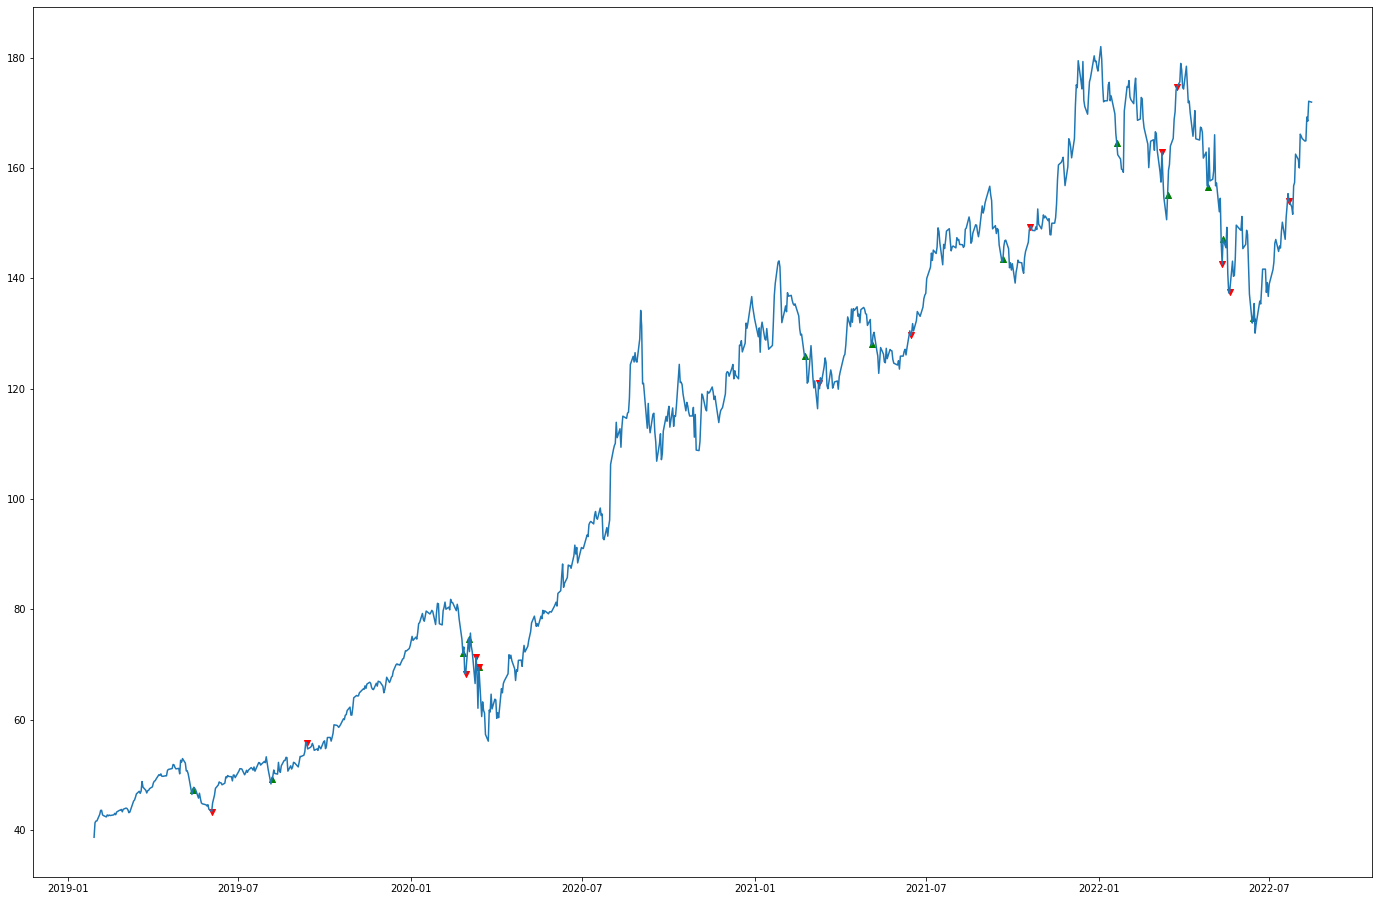

In [ ]:
plt.figure(figsize=(24,16))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker ='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker ='v', c='r')

In [ ]:
(pd.Series([(sell - buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

0.03658485290868296